In [14]:
from m1 import KNNRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
model=KNNRegressor(k=3)
files="D:/Internship/Models/Linear_Regression/Data/house_prices.csv"

In [16]:
df=pd.read_csv(files)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [18]:
df.drop(["id","date","yr_built","yr_renovated","zipcode","lat","long"],axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  object 
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  object 
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 2.3+ MB


In [20]:
df[["waterfront","condition"]]

,waterfront,condition
0,N,Average
1,N,Average
2,N,Average
3,N,Very Good
4,N,Average
...,...,...
21608,N,Average
21609,N,Average
21610,N,Average
21611,N,Average


In [21]:
df.drop("waterfront",axis=1,inplace=True)


In [22]:
df["condition"]=[0 if val=="Average" else 1 for val in df["condition"]]

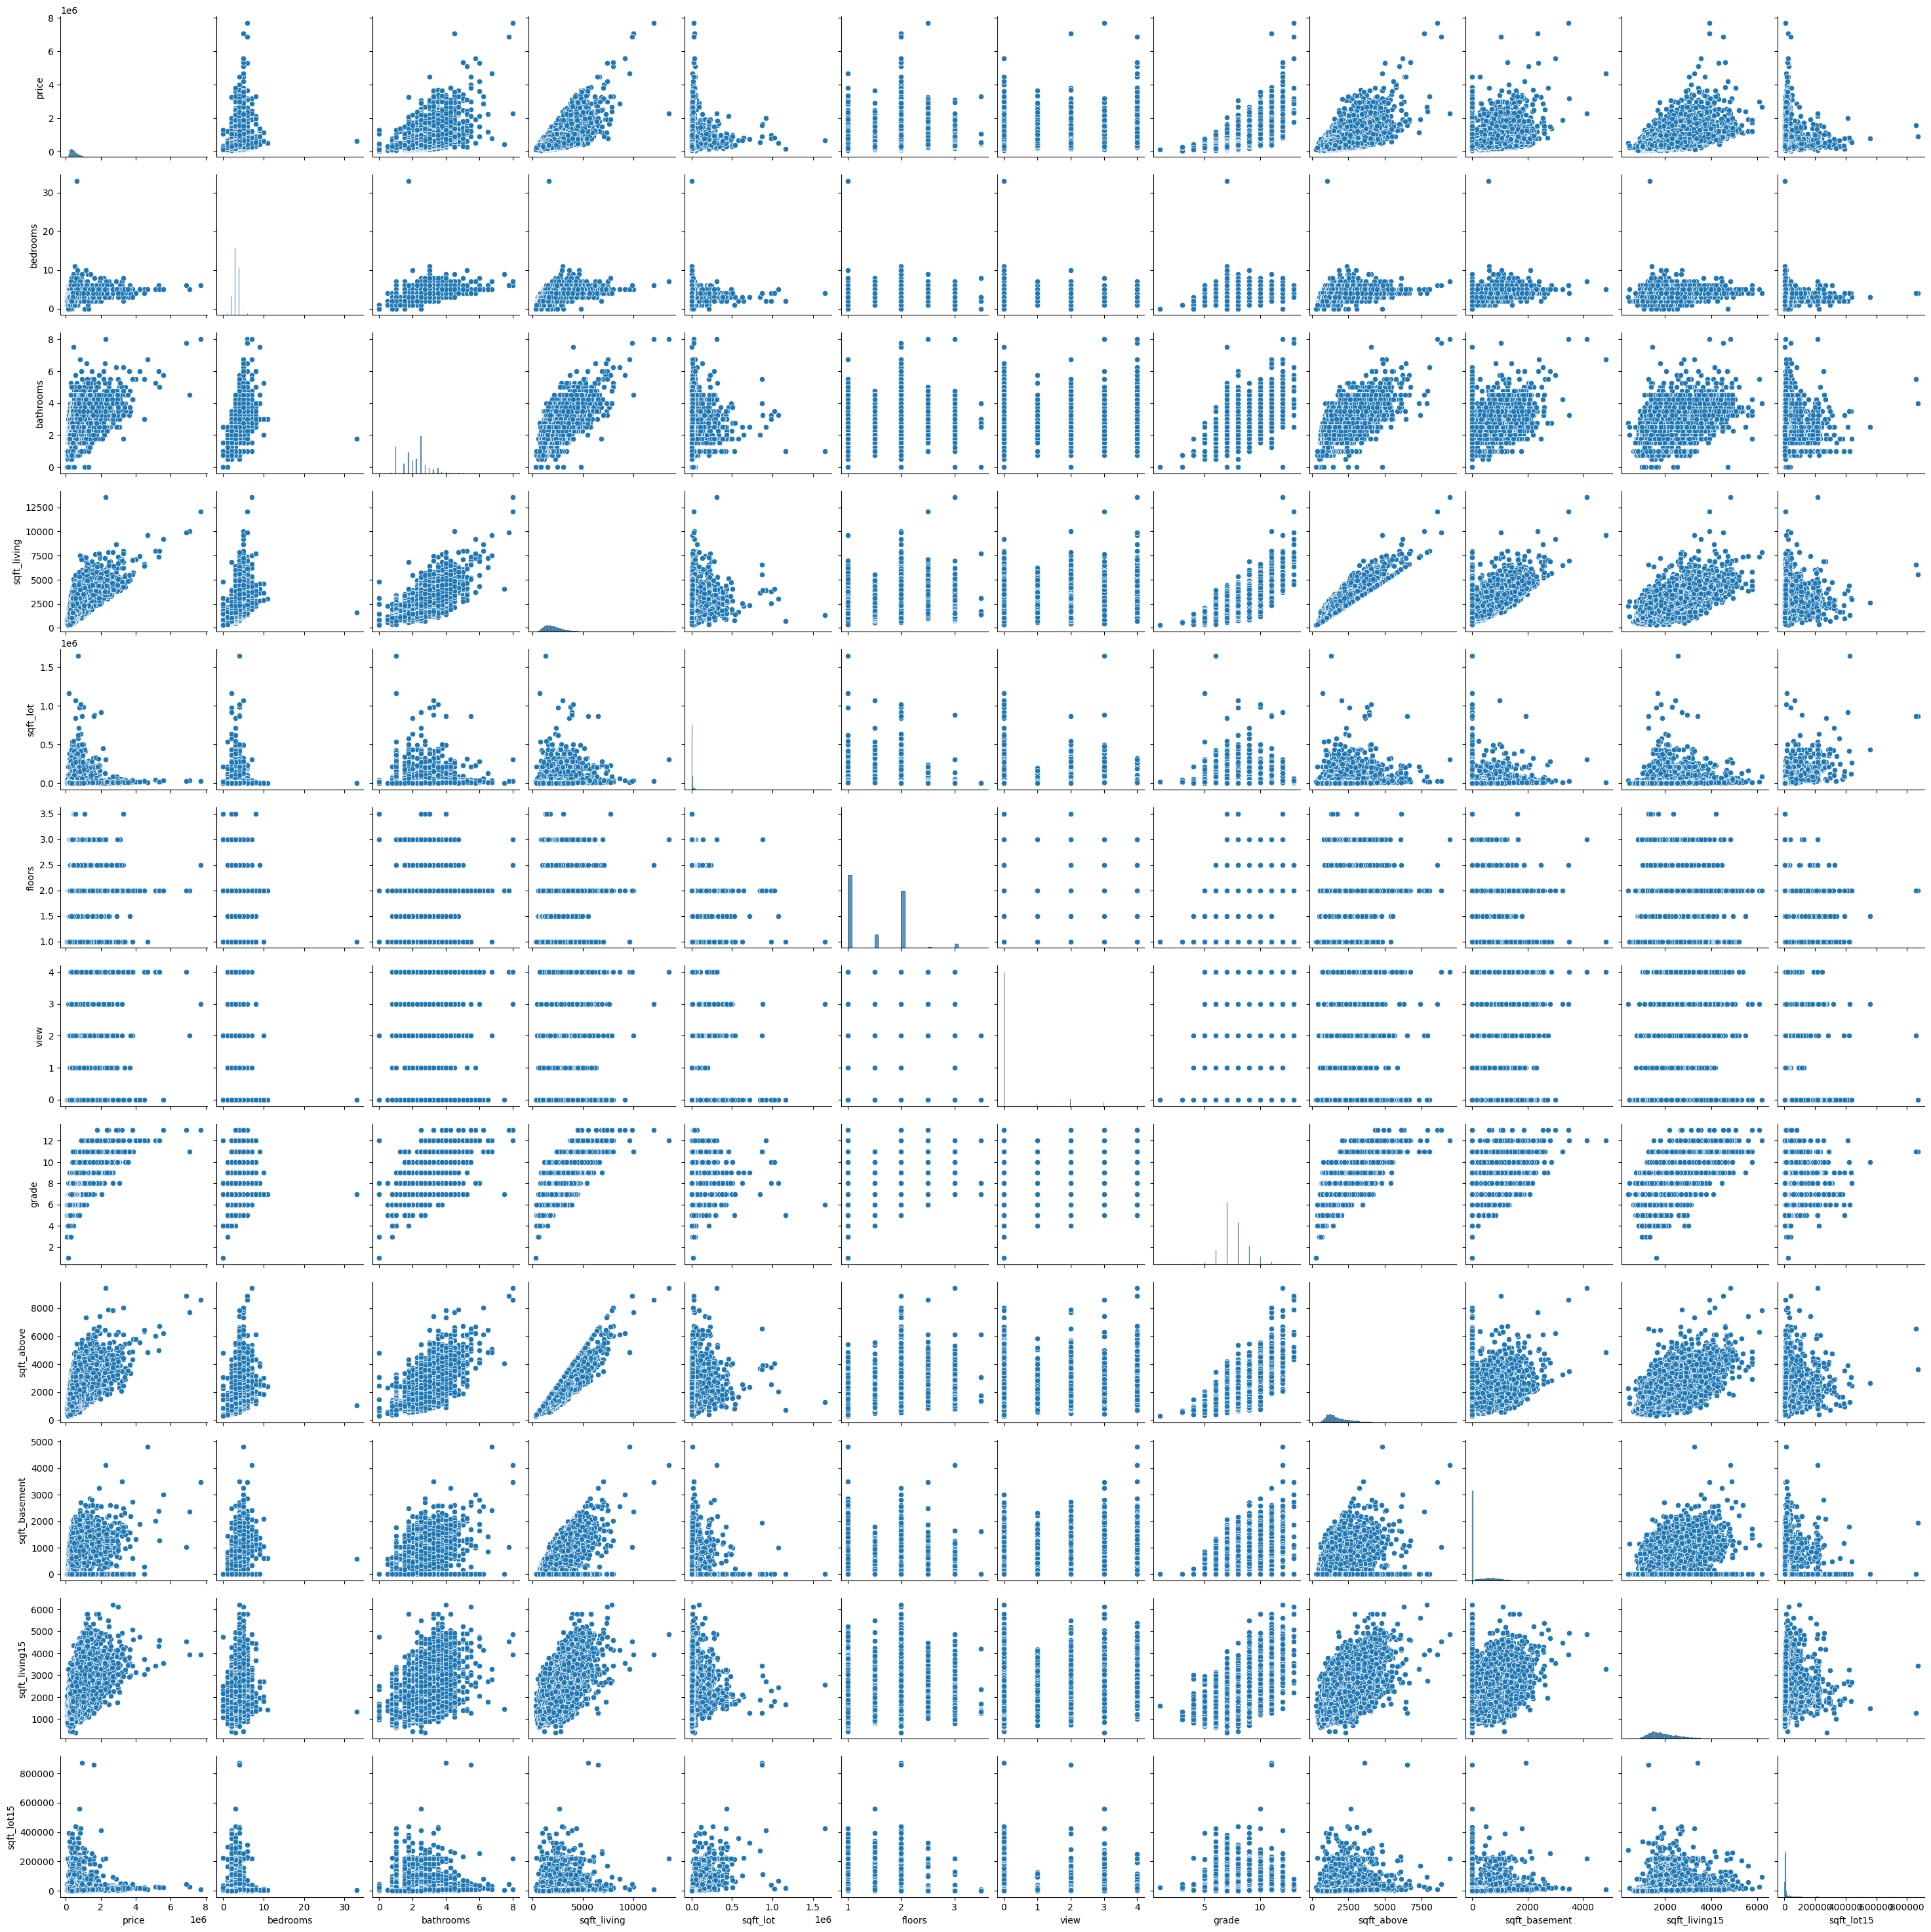

In [13]:
import seaborn as sns
sns.pairplot(df,kind='scatter')

In [25]:
X=df[["bathrooms","sqft_living","sqft_above"]]
y=df["price"]

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=KNNRegressor(k=50)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [39]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))


68925128838.21251
167777.7428655151
0.5225685061752176


In [52]:
from sklearn.tree import DecisionTreeRegressor
DRmodel=DecisionTreeRegressor(max_depth=5,min_samples_split=4)
DRmodel.fit(X_train,y_train)
DRmodel.fit(X_train,y_train)
y_pred=DRmodel.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))


72967285279.15378
171993.07174841457
0.4945692434911827


In [53]:
from sklearn.ensemble import RandomForestRegressor
DRmodel=RandomForestRegressor(max_depth=5,min_samples_split=4)
DRmodel.fit(X_train,y_train)
DRmodel.fit(X_train,y_train)
y_pred=DRmodel.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

70438132899.50362
169781.10581070968
0.5120882096372051
